## 1.1 선형 회귀

- 훈련 셋 범위의 밖의 샘플을 예측할 수 없음. -> 선형회귀 활용 필요(1차원의 선 그리기)

In [38]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
perch_df = df.loc[df['Species'] == 'Perch']

# 1. perch 종의 길이를 기반으로 무게 예측

perch_lenght = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

In [40]:
# 2. 훈련, 결과 데이터에 넣고 섞어주기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(perch_lenght, perch_weight)

In [41]:
# 3. 선형 회귀

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [42]:
# 4. 학습

lr.fit(train_input, train_target)

LinearRegression()

In [43]:
# 5. 평가

lr.score(test_input, test_target)

0.9167677752011478

In [44]:
# 6. 예측

lr.predict([[50]])

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1196.92867721]])

### - ax + b (a: 37, b : -676)
- a : 가중치, 계수(coef)

In [45]:
lr.coef_

array([[36.61615441]])

In [46]:
lr.intercept_

array([-633.87904319])

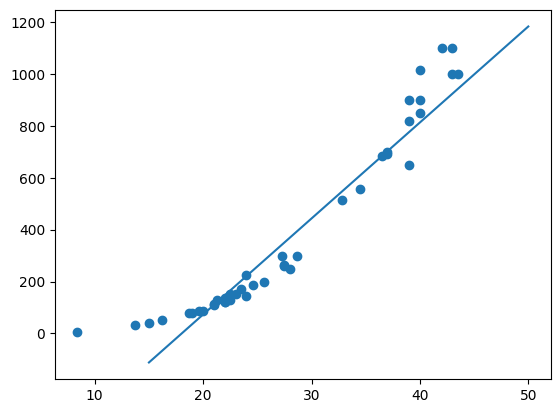

In [47]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15,50], [15 * 37 - 667, 50 * 37 -667]) #선 그래프 : 시작점을 정해줌

In [49]:
# 과소 적합 : 훈련용 데이터가 충분히 학습하지 못함. (테스트용 score가 더 높은 경우)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9190716111477903
0.9167677752011478


In [51]:
lr.predict([[50]]) #cm에 대해 음수 무게가 나옴. -> 선형 회귀의 한계 (2차원의 곡선 필요)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1196.92867721]])

## 1.2 다항 회귀

- ax**2 + bx + c

In [25]:
# 1. 새로운 데이터 만들어주기

train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input

,Length2,Length2_poly
112,36.5,1332.25
121,40.0,1600.00
99,25.0,625.00
101,26.5,702.25
109,32.8,1075.84
105,27.5,756.25
122,40.0,1600.00
117,39.0,1521.00
124,43.0,1849.00
118,39.0,1521.00


In [26]:
# 2. 회귀

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [27]:
lr.score(test_input, test_target)

0.9843552050924564

In [29]:
lr.predict([[2,4]])

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.49849144]])

In [30]:
# a,b 확인

print(lr.coef_, lr.intercept_)

[[-22.161668     1.02999694]] [116.7018397]
